## 1. Imported Required Libraries

In [72]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


## 2. Load and Clean Data

In [73]:
# Load dataset
df = pd.read_csv("Market.csv")

In [74]:
# Basic cleaning
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

## 3. Exploratory Data Analysis(EDA)

In [45]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
92450,N225,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0
92451,N225,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0
92452,N225,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0
92453,N225,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0
92455,N225,1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0.0


In [26]:
df.dtypes

Index                object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [46]:
df.shape

(110238, 8)

In [40]:
df.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
# Summary stats
print(df.describe())

                                Date           Open           High  \
count                         110238  110238.000000  110238.000000   
mean   2002-05-28 00:08:02.795406336    7659.533751    7705.450562   
min              1965-01-05 00:00:00      54.869999      54.869999   
25%              1993-12-16 00:00:00    1856.080048    1865.443055   
50%              2004-11-04 00:00:00    5195.604981    5228.150147   
75%              2013-06-25 00:00:00   10135.297363   10207.907718   
max              2021-06-03 00:00:00   68775.062500   69403.750000   
std                              NaN    9011.683433    9066.819822   

                 Low          Close      Adj Close        Volume  
count  110238.000000  110238.000000  110238.000000  1.102380e+05  
mean     7608.965362    7658.517553    7658.373267  1.274149e+09  
min        54.869999      54.869999      54.869999  0.000000e+00  
25%      1844.425018    1856.164947    1855.502289  0.000000e+00  
50%      5156.045166    5196.04003

In [41]:
df.duplicated().sum()

0

In [47]:
df.sample(frac=0.10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
82608,SSMI,2015-08-27,8758.099609,8830.089844,8724.269531,8812.580078,8812.580078,6.026260e+07
84786,TWII,2000-04-24,9128.950195,9128.950195,8807.709961,8808.089844,8808.057617,0.000000e+00
31303,HSI,2004-11-17,13787.389650,13858.629880,13770.269530,13824.980470,13824.980470,4.690392e+08
97516,N225,1984-06-06,10254.200200,10254.200200,10254.200200,10254.200200,10254.200200,0.000000e+00
46428,GSPTSE,1998-12-15,6231.600098,6240.700195,6218.500000,6236.700195,6236.700195,7.221770e+09
...,...,...,...,...,...,...,...,...
83756,SSMI,2020-03-24,8187.509766,8733.320313,8187.020020,8733.320313,8733.320313,1.409920e+08
488,NYA,1967-12-07,561.150024,561.150024,561.150024,561.150024,561.150024,0.000000e+00
86295,TWII,2006-02-13,6591.990234,6623.549805,6557.759766,6562.290039,6562.265137,2.955000e+06
32204,HSI,2008-07-11,21834.640630,22225.380860,21761.039060,22184.550780,22184.550780,2.163732e+09


In [27]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

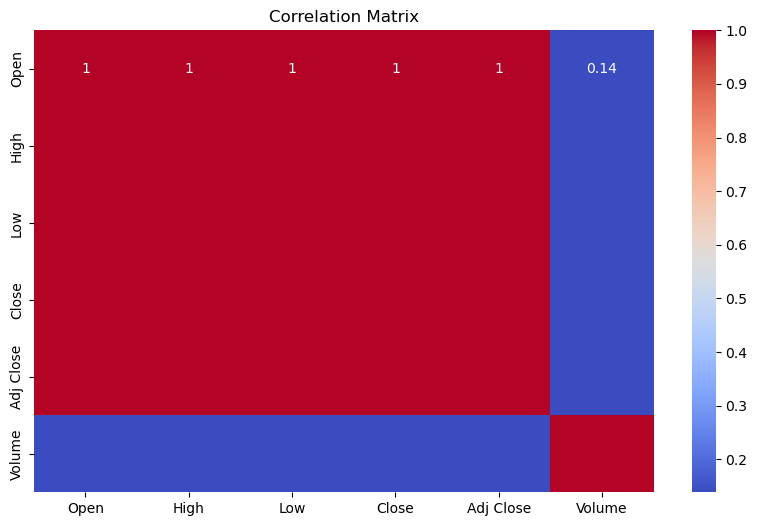

In [29]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

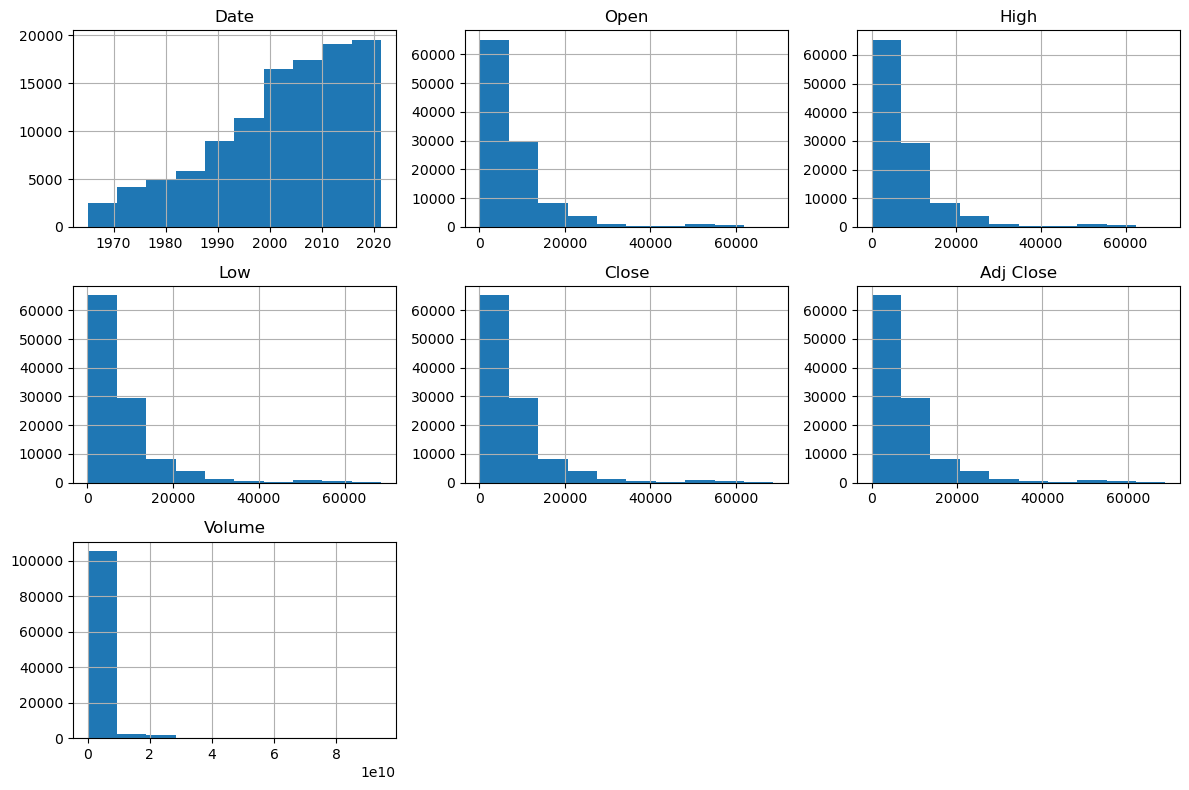

In [50]:
# Histograms
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

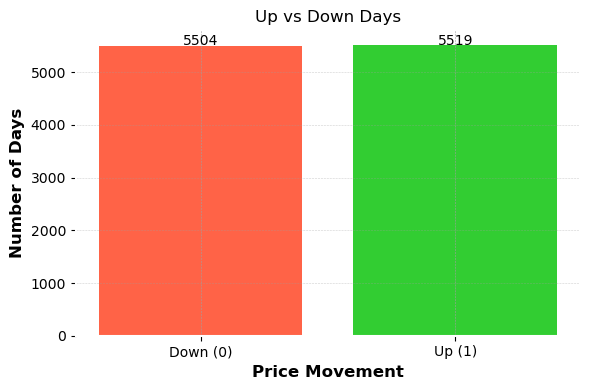

In [68]:
# Bar chart
counts = df_sampled['Up'].value_counts().sort_index()
labels = ['Down (0)', 'Up (1)']
values = [counts[0], counts[1]]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['tomato', 'limegreen'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, str(bar.get_height()), ha='center')
plt.title('Up vs Down Days')
plt.xlabel('Price Movement')
plt.ylabel('Number of Days')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

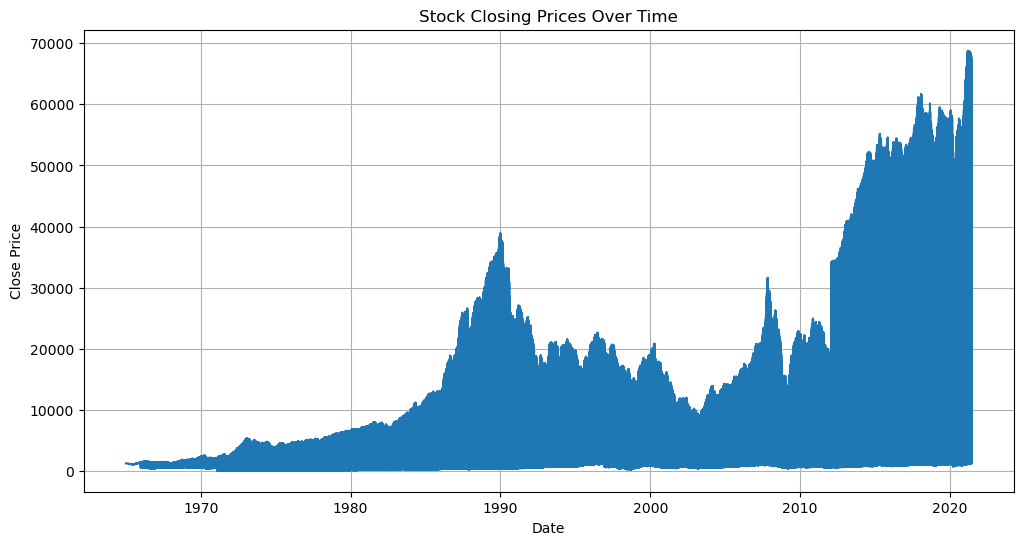

In [21]:
# Time series line chart
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.show()

## 4. Sampling for Modeling

In [31]:
df_sampled = df.sample(frac=0.1, random_state=42).sort_values('Date').reset_index(drop=True)

## 5. Data Mining #1 – Time Series Forecasting (Prophet)

In [8]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -----------------

14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:52 - cmdstanpy - INFO - Chain [1] done processing


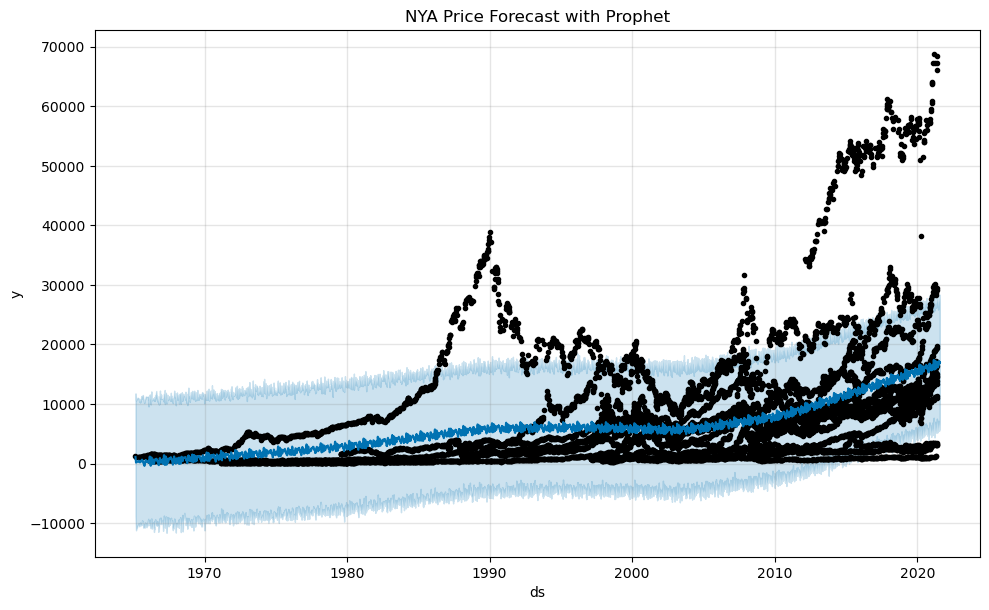

In [32]:
# Prepare for Prophet
df_prophet = df_sampled[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Forecast 60 days into the future
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("NYA Price Forecast with Prophet")
plt.show()


## 6. . Data Mining Technique #2 – Classification (Decision Tree)

In [34]:
# Create target column: 1 if next day's close is higher
df_sampled['Price_Change'] = df_sampled['Close'].diff()
df_sampled['Up'] = (df_sampled['Price_Change'] > 0).astype(int)
df_sampled.dropna(inplace=True)

In [35]:
# Features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df_sampled[features]
y = df_sampled['Up']

In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [38]:
# Predict
y_pred = model.predict(X_test)

In [39]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7197278911564626
Precision: 0.6978361669242659
Recall: 0.7991150442477876


## 7. Data Mining Technique #3 – Pattern Recognition (Hammer Candlestick Pattern)

In [62]:
pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 435.7 kB/s eta 0:00:01
   -------------------------------------- - 71.7/75.0 kB 558.5 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 518.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Define hammer pattern logic
def is_hammer(row):
    body = abs(row['Open'] - row['Close'])
    lower_shadow = min(row['Open'], row['Close']) - row['Low']
    upper_shadow = row['High'] - max(row['Open'], row['Close'])
    return lower_shadow > 2 * body and upper_shadow < body

# Apply function
df_sampled['Hammer'] = df_sampled.apply(is_hammer, axis=1)

# Also create "Up" label for evaluation (as in classification)
df_sampled['Up'] = (df_sampled['Close'].shift(-1) > df_sampled['Close']).astype(int)

# Evaluate: how often a hammer is followed by an upward move
hammer_hits = df_sampled[(df_sampled['Hammer']) & (df_sampled['Up'] == 1)]
hammer_total = df_sampled[df_sampled['Hammer']]

print("Total Hammer Patterns Detected:", len(hammer_total))
print("Correct Upward Moves after Hammer:", len(hammer_hits))
if len(hammer_total) > 0:
    print("Accuracy of Hammer as Predictor:", len(hammer_hits) / len(hammer_total))


Total Hammer Patterns Detected: 526
Correct Upward Moves after Hammer: 249
Accuracy of Hammer as Predictor: 0.47338403041825095


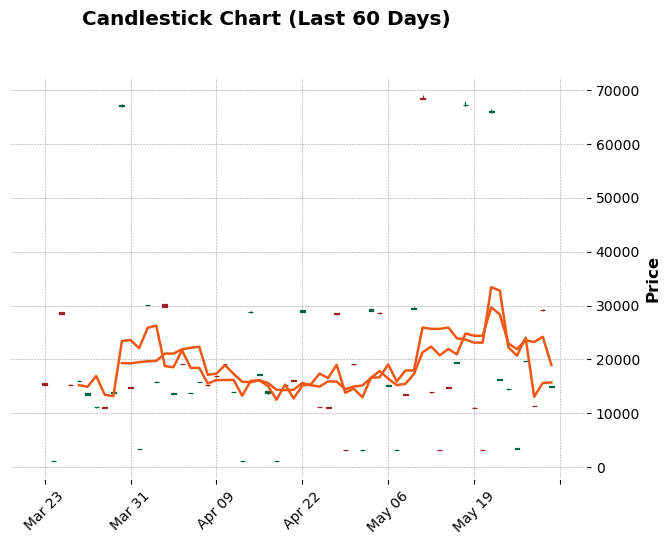

In [71]:
 #CANDLESTICK CHART: Last 60 Days
df_candle = df_sampled[['Date', 'Open', 'High', 'Low', 'Close']].set_index('Date')
df_candle = df_candle.tail(60)

mpf.plot(df_candle, type='candle', style='charles',
         title='Candlestick Chart (Last 60 Days)',
         ylabel='Price',
         volume=False,
         mav=(5, 10))